In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans

In [12]:
data = './BillionairesStatisticsDataset.csv'
dataset = pd.read_csv(data)

for column in dataset:
    if dataset[column].dtype == 'object':
        dataset[column] = pd.factorize(dataset[column])[0]

dataset.dropna(inplace=True)
dataset = dataset[
    [
        "finalWorth",
        "personName",
        "age",
        "country",
        "city",
        "source",
        "countryOfCitizenship",
    ]
]

dataset

,finalWorth,personName,age,country,city,source,countryOfCitizenship
0,211000,0,74.0,0,0,0,0
1,180000,1,51.0,1,1,1,1
2,114000,2,59.0,1,2,2,1
3,107000,3,78.0,1,3,3,1
4,106000,4,92.0,1,4,4,1
...,...,...,...,...,...,...,...
2635,1000,2633,51.0,5,33,904,5
2636,1000,2634,80.0,1,738,82,1
2637,1000,2635,60.0,5,739,905,5
2638,1000,2636,71.0,5,455,36,5


Text(0, 0.5, 'Внутри-кластерная сумма расстояния')

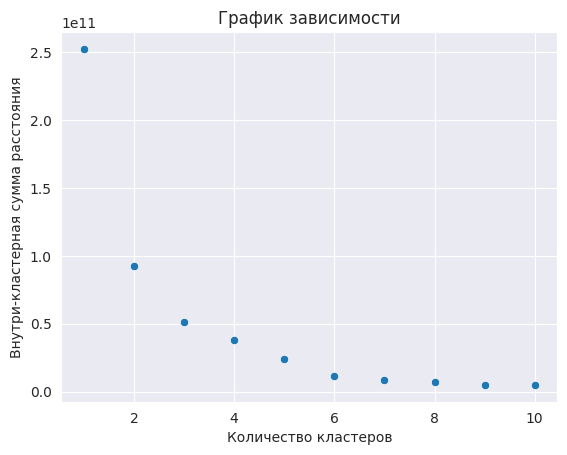

In [15]:
inertia = []

for i in range(1, 11):
  k_means = KMeans(n_clusters=i, init= "k-means++", n_init="auto")
  k_means.fit(
      dataset.drop(
          "country",
          axis=1,
      )
  )
  inertia.append(k_means.inertia_)

sns.set_style("darkgrid")
sns.scatterplot(
    x=[x for x in range(1, 11)],
    y=inertia,
)

plt.title("График зависимости")
plt.xlabel("Количество кластеров")
plt.ylabel("Внутри-кластерная сумма расстояния")

In [17]:
CLUSTERS = 4

model = KMeans(
    n_clusters=CLUSTERS
)

model.fit(
    dataset.drop(
        "country",
        axis=1,
    )
)

clusters = pd.DataFrame(
    columns=dataset.columns.drop("country"),
    data=model.cluster_centers_
)

clusters["Amount"] = np.unique(
    model.labels_,
    return_counts=True
)[1]

clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,finalWorth,personName,age,city,source,countryOfCitizenship,Amount
0,3095.728754,1373.512109,64.768824,197.786438,279.033025,9.822985,2271
1,78675.000000,11.500000,69.500000,8.250000,9.700000,1.700000,20
2,23193.269231,76.471154,68.269231,40.269231,50.000000,7.288462,104
3,195500.000000,0.500000,62.500000,0.500000,0.500000,0.500000,2
